<a href="https://colab.research.google.com/github/hieu98km/Install-Application/blob/main/OCR_So_do_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Fri Mar 24 06:41:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Clone repo

In [ ]:
!git clone https://github.com/kaylode/vnm-ocr-toolbox.git main
%cd main

Cloning into 'main'...
remote: Enumerating objects: 1246, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 1246 (delta 54), reused 10 (delta 10), pack-reused 1166
Receiving objects: 100% (1246/1246), 23.63 MiB | 17.36 MiB/s, done.
Resolving deltas: 100% (622/622), done.
/content/main/main


In [ ]:
%cd main
!git checkout master
!git reset --hard HEAD
!git pull

[Errno 2] No such file or directory: 'main'
/content/main/main
Already on 'master'
Your branch is up to date with 'origin/master'.
HEAD is now at ef8744b update dataset link
Already up to date.


# Install dependencies

In [ ]:
%%capture
%cd /content/main/
!pip install -r requirements.txt

# Download pretrained weights

In [ ]:
%cd /content/main
!mkdir "/content/main/weights"

/content/main
mkdir: cannot create directory ‘/content/main/weights’: File exists


# Inference

## Inference modules on Personal ID

In [ ]:
%cd /content/main
import os
import cv2
import re
import pandas as pd
from modules import Preprocess, Detection, OCR, Correction
from tool.utils import natural_keys, visualize
import time
import matplotlib.pyplot as plt

/content/main


In [ ]:
# Define some variables
img_id = "sodo_2023_"

det_weight = r"/content/drive/MyDrive/sodo/PANNet_best_map.pth"
ocr_weight = "/content/drive/MyDrive/sodo/transformerocr.pth" 

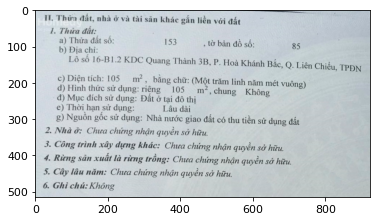

In [ ]:
# Read image
img = cv2.imread(f"/content/main/sodo1.jpg")

plt.imshow(img)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Initialize modules

det_model = Detection(weight_path=det_weight)
ocr_model = OCR(weight_path=ocr_weight)
preproc = Preprocess(
    det_model=det_model,
    ocr_model=ocr_model,
    find_best_rotation=False)
correction = Correction()

load pretrained models from imagenet


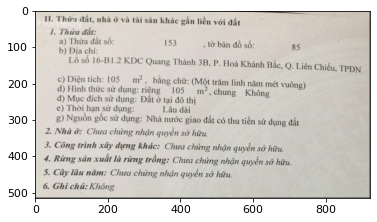

In [ ]:
# Preprocess image
img1 = preproc(img)
plt.imshow(img1)
plt.show()

/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:3609: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


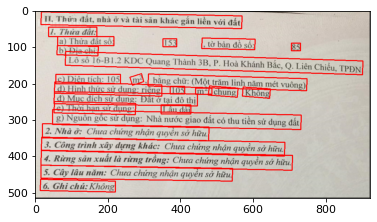

In [ ]:
# Detect texts

boxes, img2  = det_model(
    img1,
    crop_region=True,                               #Crop detected regions for OCR
    return_result=True,                             # Return plotted result
    output_path=f"/content/main/results/{img_id}"   #Path to save cropped regions
)

plt.imshow(img2)
plt.show()

In [ ]:
# Text OCR

img_paths=os.listdir(f"/content/main/results/{img_id}/crops") # Cropped regions
img_paths.sort(key=natural_keys)
img_paths = [os.path.join(f"/content/main/results/{img_id}/crops", i) for i in img_paths]

texts, probs = ocr_model.predict_folder(img_paths, return_probs=True) # OCR
texts = correction(texts)   # Word correction

for i in texts:
    print(i)

II. Thửa đất, nhà ở và tài sản khác gắn liền với đất
1. Thửa đất:
địa a) Thửa đất số:
, tờ bản đồ số:
153
85
b) Địa chỉ:
Lồ số 16-B1.2 KDC Quang Thành 3B, P. Hoà Khánh Bắc, Q. Liên Chiều, TPĐN
bằng chữ: (Một trăm linh năm mét vuông)
c) Diện tích: 105
m?
d) Hình thức sử dụng: riệng
, chung
105
Không
mẻ
đ) Mục đích sử dụng: Đất ở tại đô thị
e) Thời hạn sử dụng:
Lâu dài
g) Nguồn gốc sử dụng: Nhà nước giao đất có thu tiền sử dụng đất
2. Nhà ở: Chưa chứng nhận quyền sở hữu.
3. Công trình xây dựng khác: Chưa chứng nhận quyền sở hữu.
4. Rừng sản xuất là rừng trồng: Chưa chứng nhận quyền sở hữu.
5. Cây lâu năm: Chưa chứng nhận quyền sở hữu.
6. Ghi chú: Không


In [ ]:
# Define the path of the output text file
output_path = "/content/main/results/output.txt"

# Perform OCR on the image crops
img_paths = os.listdir(f"/content/main/results/{img_id}/crops")
img_paths.sort(key=natural_keys)
img_paths = [os.path.join(f"/content/main/results/{img_id}/crops", i) for i in img_paths]

texts, probs = ocr_model.predict_folder(img_paths, return_probs=True)
texts = correction(texts)

# Save the OCR results to the output text file
with open(output_path, "w") as f:
    for text in texts:
        f.write(text + "\n")

# Print the OCR results
print("OCR results saved to:", output_path)

OCR results saved to: /content/main/results/output.txt


In [ ]:
import json

# Define the path of the output JSON file
output_path = "/content/main/results/output.json"

# Find all image crops and sort them by natural order
img_paths = os.listdir(f"/content/main/results/{img_id}/crops")
img_paths.sort(key=natural_keys)

# Predict OCR for each image crop and perform text correction
texts, probs = ocr_model.predict_folder([os.path.join(f"/content/main/results/{img_id}/crops", i) for i in img_paths], return_probs=True)
texts = correction(texts)

# Create a dictionary to store the OCR results
results_dict = {}
for idx, (text, prob) in enumerate(zip(texts, probs)):
    results_dict[str(idx+1)] = {"text": text, "confidence": float(prob)}

# Save the OCR results to the output JSON file
with open(output_path, "w") as f:
    json.dump(results_dict, f, ensure_ascii=False)

# Print the OCR results
print("OCR results saved to:", output_path)

OCR results saved to: /content/main/results/output.json


In [ ]:
!pip install fastapi uvicorn Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 13.1 MB/s eta 0:00:00


In [ ]:
!pip install uvicorn python-multipart

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fastapi import FastAPI, File, UploadFile
import os
import io
from PIL import Image
import json
import uvicorn

# Đường dẫn lưu trữ file JSON kết quả
OUTPUT_PATH = "results/output.json"

# Đường dẫn lưu trữ file ảnh tạm thời
TEMP_PATH = "results/temp.jpg"

# Hàm xử lý dự đoán và trả kết quả
def predict(image):
    # Lưu ảnh vào đường dẫn tạm thời
    with open(TEMP_PATH, "wb") as buffer:
        buffer.write(image)

    # Thực hiện các xử lý OCR và trả về kết quả
    # Define some variables
    img_id = "sodo_2023_"
    det_weight = r"/content/drive/MyDrive/sodo/PANNet_best_map.pth"
    ocr_weight = "/content/drive/MyDrive/sodo/transformerocr.pth" 

    # Read image
    img = cv2.imread(image)

    # Initialize modules
    det_model = Detection(weight_path=det_weight)
    ocr_model = OCR(weight_path=ocr_weight)
    preproc = Preprocess(
        det_model=det_model,
        ocr_model=ocr_model,
        find_best_rotation=False)
    correction = Correction()

    # Preprocess image
    img1 = preproc(img)

    # Detect texts

    boxes, img2  = det_model(
        img1,
        crop_region=True,                               #Crop detected regions for OCR
        return_result=True,                             # Return plotted result
        output_path=f"/content/main/results/{img_id}"   #Path to save cropped regions
    )

    # Text OCR
    # Define the path of the output JSON file
    output_path = "/content/main/results/output.json"

    # Find all image crops and sort them by natural order
    img_paths = os.listdir(f"/content/main/results/{img_id}/crops")
    img_paths.sort(key=natural_keys)

    # Predict OCR for each image crop and perform text correction
    texts, probs = ocr_model.predict_folder([os.path.join(f"/content/main/results/{img_id}/crops", i) for i in img_paths], return_probs=True)
    texts = correction(texts)

    # Create a dictionary to store the OCR results
    results_dict = {}
    for idx, (text, prob) in enumerate(zip(texts, probs)):
        results_dict[str(idx+1)] = {"text": text, "confidence": float(prob)}

    # Save the OCR results to the output JSON file
    with open(output_path, "w") as f:
        json.dump(results_dict, f, ensure_ascii=False)

    # Print the OCR results
    print("OCR results saved to:", output_path)

    # Trả về kết quả dưới dạng JSON
    return results_dict

# Định nghĩa API upload file

# Khởi tạo ứng dụng FastAPI
app = FastAPI()

@app.get("/")
async def root():
    return {"message": "Hello World"}
@app.post("/api/uploadfile/")
async def create_upload_file(file: UploadFile = File(...)):
    """Upload a file"""
    # save file to disk
    with open(os.path.join("results", file.filename), "wb") as buffer:
        shutil.copyfileobj(file.file, buffer)

    # call the predict function with the saved file
    with open(os.path.join("results", file.filename), "rb") as buffer:
        result = predict(buffer.read())

    # return the prediction result
    return result
# Chạy ứng dụng FastAPI
if __name__ == "__main__":
    os.makedirs("results", exist_ok=True)
    uvicorn.run(app, host="0.0.0.0", port=8000)

In [ ]:
!uvicorn main:app --reload

INFO:     Will watch for changes in these directories: ['/content/main']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [39114] using StatReload
INFO:     Started server process [39116]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
